In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spotify = pd.read_csv(
    "spotify_songs.csv"
)
spotify.head()

music_covariates = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

other_covariates = ['track_album_name', 'track_name', 'track_artist']

music = spotify[music_covariates] #subset for music covariates only
music_X = spotify[music_covariates]
music_Y = spotify['playlist_genre']

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



In [ ]:
X_norm = StandardScaler().fit_transform(music_X)

In [6]:
print(gm.bic)

<bound method GaussianMixture.bic of GaussianMixture(n_components=5, n_init=10, random_state=47)>


In [10]:
# Set up a range of cluster numbers to try
n_range = range(3,10)

# Create empty lists to store the BIC and AIC values
bic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=47)
    gm.fit(X_norm)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(X_norm))
    


<Figure size 720x720 with 0 Axes>

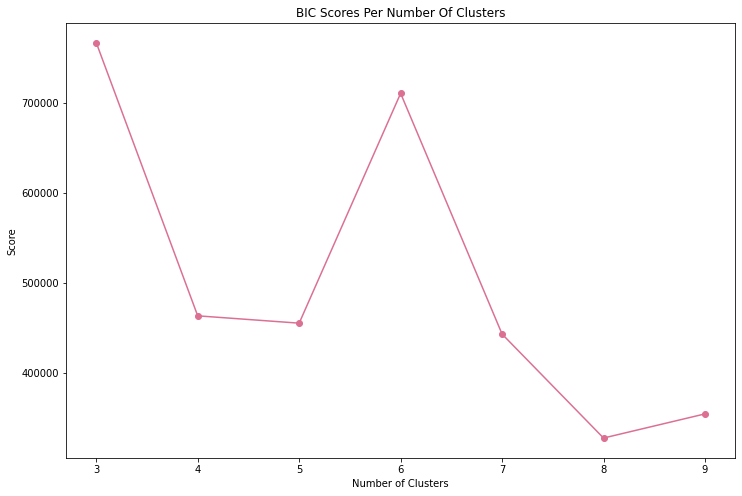

In [11]:
# Plot the BIC and AIC values together
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='palevioletred')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC Scores Per Number Of Clusters')
plt.show()

In [13]:
## Smallest BIC score is in 8 clusters
## We fit a model to 8 gaussian clusters

final_gmm = GaussianMixture(n_components=8, random_state = 4747)
final_gmm.fit(X_norm)
probs = final_gmm.predict_proba(X_norm)



In [15]:
labels = final_gmm.predict(X_norm)

In [17]:
davies_bouldin_score(X_norm, labels)

3.803696881750069

In [19]:
silhouette_score(X_norm, labels)

0.003031667141217114

In [25]:
gaussian_labels = music_X.copy()

In [26]:
gaussian_labels['label'] = labels

In [27]:
gaussian_labels.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,label
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,6
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1


In [ ]:
gaussian_labels.to_csv('')

"The Davies_bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering."

Our DB is high and silhouette score is close to 0 for gaussian mixture clustering indicating that there is a lot of overlap between clusters. K-means gave us a lower DB score. Let's go back to K-means for now.

In [28]:
from sklearn.cluster import KMeans

In [39]:
kmeans_model = KMeans(n_clusters=8, random_state=4747)
kmeans_model.fit(X_norm)
labels_kmeans = kmeans_model.predict(X_norm)


In [36]:
davies_bouldin_score(X_norm, labels_kmeans)

1.969680055931819

In [38]:
silhouette_score(X_norm, labels_kmeans)

0.09926344083302047

Silhouette Scores:
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.